In [83]:
#ID : 20200090 + 20200232
#
# S: 5

import numpy as np
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.astype('float64')
X_test=X_test.astype('float64')

train_mask = np.logical_or(y_train == 0, y_train == 1)
test_mask = np.logical_or(y_test == 0, y_test == 1)
X_train, y_train = X_train[train_mask], y_train[train_mask]
X_test, y_test = X_test[test_mask], y_test[test_mask]

shuffled_indices = np.random.permutation(len(X_train))
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]

X_imgtrain=X_train
X_imgtest=X_test
"""
#scale
X_train = X_train/255 
X_test = X_test/255
"""
std=np.std(X_train, axis=0)
std=np.where(std==0,1,std)
X_train=(X_train - np.mean(X_train,axis=0))/std

std1=np.std(X_test, axis=0)
std1=np.where(std1==0,1,std1)
X_test=(X_test - np.mean(X_test,axis=0))/std1

X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

print(X_train.shape)  
print(X_test.shape)   

(12665, 784)
(2115, 784)


Label: 0


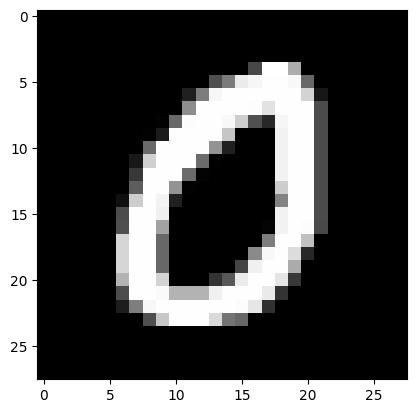

In [84]:
import matplotlib.pyplot as plt
image, label = X_imgtrain[0],y_train[0]
plt.imshow(image, cmap='gray')
print("Label:",label)

In [85]:
def test_split(X_train,y_train,size):
  fs = (len(X_train) // 10) 
  test_X=X_train[(fs*(size-1)):(fs*size)+1,:]
  test_y=y_train[(fs*(size-1)):(fs*size)+1]  
  train_X = np.delete(X_train, slice((fs*(size-1)), (fs*size)+1), axis=0)
  train_y = np.delete(y_train, slice((fs*(size-1)), (fs*size)+1), axis=0)
  return train_X, test_X, train_y, test_y


In [86]:
import random
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))          

def logisticRegression(X, y,num_iter,lr):
    tolerance = 1e-8
    m, n = X.shape 
    random.seed(0)
    #w=np.zeros((n,1))
    w=np.random.uniform(size=(n,1),low=-0.2,high=0.1)

    for i in range(num_iter):
        z=X@ w    #  (11398,784)@(784,1) =  (11398,1)                  
        yp = sigmoid(z) #(11398,1)     
        y = y.reshape((m, 1)) #(11398,1)        
        cost= (1 / m) *( -(y.T @ np.log(yp)) - ((1 - y).T @ np.log(1 - yp)) )             
        cost = cost.sum(axis = 0)  
        dw = (1 / m) * (X.T @ (yp - y))        
        w = w - (dw* lr)        
        if cost < tolerance: break        
    return w 

In [88]:
import pandas as pd  
 
result_df = pd.DataFrame(columns=['Fold','Logistic Regression score (%)','error'])             


bestAvg=0
best_lr=0
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
  score = list()   
  print(f"10 Fold for Lr =  {lr}:")
  for fold in range(10):           
    train_X, test_X, train_y, test_y=test_split(X_train,y_train, (fold+1))                
    final_W = logisticRegression(train_X, train_y,1000,lr) 
    
    prediction = sigmoid(test_X @ final_W)    #(784,1)       
    prediction = [1 if elem > 0.5 else 0 for elem in prediction]         
    
    error=np.sum(prediction !=  test_y)  
      
    score.append(round(np.mean(prediction ==  test_y)*100,2))  
    result_df.loc[fold] = [fold+1,score[fold],error]  


  avg_10fold =round(sum(score)/len(score),2)
  if bestAvg < avg_10fold:
    bestAvg = avg_10fold
    best_lr = lr   

  display(result_df)                                              
  print("The average score for Logistic Regression is: ", avg_10fold ,'%')

print(best_lr)
print(bestAvg)

10 Fold for Lr =  0.1:


,Fold,Logistic Regression score (%),error
0,1.0,99.61,5.0
1,2.0,99.92,1.0
2,3.0,99.76,3.0
3,4.0,99.61,5.0
4,5.0,99.76,3.0
5,6.0,99.61,5.0
6,7.0,99.61,5.0
7,8.0,99.68,4.0
8,9.0,99.68,4.0
9,10.0,99.84,2.0


The average score for Logistic Regression is:  99.71 %
10 Fold for Lr =  0.01:


,Fold,Logistic Regression score (%),error
0,1.0,99.21,10.0
1,2.0,99.53,6.0
2,3.0,99.29,9.0
3,4.0,99.29,9.0
4,5.0,99.21,10.0
5,6.0,99.21,10.0
6,7.0,99.37,8.0
7,8.0,99.21,10.0
8,9.0,99.37,8.0
9,10.0,99.45,7.0


The average score for Logistic Regression is:  99.31 %
10 Fold for Lr =  0.001:


,Fold,Logistic Regression score (%),error
0,1.0,96.92,39.0
1,2.0,98.03,25.0
2,3.0,97.16,36.0
3,4.0,97.24,35.0
4,5.0,97.16,36.0
5,6.0,96.45,45.0
6,7.0,97.16,36.0
7,8.0,97.63,30.0
8,9.0,98.11,24.0
9,10.0,97.32,34.0


The average score for Logistic Regression is:  97.32 %
10 Fold for Lr =  0.0001:


,Fold,Logistic Regression score (%),error
0,1.0,93.21,86.0
1,2.0,94.48,70.0
2,3.0,92.42,96.0
3,4.0,93.13,87.0
4,5.0,95.74,54.0
5,6.0,91.48,108.0
6,7.0,90.53,120.0
7,8.0,95.11,62.0
8,9.0,92.03,101.0
9,10.0,91.32,110.0


The average score for Logistic Regression is:  92.94 %
0.1
99.71


In [94]:
W = logisticRegression(X_train, y_train,1000,best_lr) 
    
prediction = sigmoid(X_test @ W)    #(784,1)       
prediction = [1 if elem > 0.5 else 0 for elem in prediction]         
    
error=np.sum(prediction !=  y_test)  
      
score=round(np.mean(prediction ==  y_test)*100,2)
print("number of misclassification = ",error)
print("final Accurcy for Logistic Regression is: ", score ,'%')

number of misclassification =  2
final Accurcy for Logistic Regression is:  99.91 %
